In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [34]:

### Load Geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

ModuleNotFoundError: No module named 'geopandas'

Number of Cases
Which country has the highest cases
Top countries affected
Distribution Per Continent
Cases Per Day
Cases Per Country(Affected Country)

In [2]:
df = pd.read_csv('covid_19_data.csv', encoding = 'ISO-8859-1')


In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
df.rename(columns={'Province/State':'Province_State','Country/Region':'Country_Region'},inplace = True)

In [6]:
df.columns

Index(['SNo', 'ObservationDate', 'Province_State', 'Country_Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [7]:
df.size

77880

In [8]:
df.shape

(9735, 8)

In [9]:
df.isna().sum()

SNo                   0
ObservationDate       0
Province_State     4433
Country_Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [10]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,9735.000000,9735.000000,9735.000000,9735.000000
mean,4868.000000,846.954494,32.906626,266.837494
std,2810.396769,5637.537679,323.778243,2903.268647
min,1.000000,0.000000,0.000000,0.000000
25%,2434.500000,3.000000,0.000000,0.000000
50%,4868.000000,25.000000,0.000000,0.000000
75%,7301.500000,177.000000,1.000000,12.000000
max,9735.000000,92472.000000,10023.000000,62098.000000


In [11]:
confirmed_df = pd.read_csv('time_series_covid_19_confirmed.csv')
deaths_df = pd.read_csv('time_series_covid_19_deaths.csv')
recoveries_df = pd.read_csv('time_series_covid_19_recovered.csv')

In [13]:
df.groupby('Last Update')['Confirmed', 'Deaths', 'Recovered'].sum()

,Confirmed,Deaths,Recovered
Last Update,,,
1/22/2020 17:00,555.0,17.0,28.0
1/23/20 17:00,653.0,18.0,30.0
1/24/20 17:00,941.0,26.0,36.0
1/25/20 17:00,1438.0,42.0,39.0
1/26/20 16:00,2118.0,56.0,52.0
...,...,...,...
2020-03-25 23:37:49,467594.0,21181.0,113770.0
2020-03-26 23:53:24,529591.0,23970.0,122150.0
2020-03-27 23:27:48,593291.0,27198.0,130915.0


In [14]:
df.groupby('Last Update')['Confirmed', 'Deaths', 'Recovered'].max()

,Confirmed,Deaths,Recovered
Last Update,,,
1/22/2020 17:00,444.0,17.0,28.0
1/23/20 17:00,444.0,17.0,28.0
1/24/20 17:00,549.0,24.0,31.0
1/25/20 17:00,761.0,40.0,32.0
1/26/20 16:00,1058.0,52.0,42.0
...,...,...,...
2020-03-25 23:37:49,74386.0,7503.0,60811.0
2020-03-26 23:53:24,80589.0,8215.0,61201.0
2020-03-27 23:27:48,86498.0,9134.0,61732.0


In [15]:
df_per_day = df.groupby('Last Update')['Confirmed', 'Deaths', 'Recovered'].max()
df_per_day                             ##per day cases

,Confirmed,Deaths,Recovered
Last Update,,,
1/22/2020 17:00,444.0,17.0,28.0
1/23/20 17:00,444.0,17.0,28.0
1/24/20 17:00,549.0,24.0,31.0
1/25/20 17:00,761.0,40.0,32.0
1/26/20 16:00,1058.0,52.0,42.0
...,...,...,...
2020-03-25 23:37:49,74386.0,7503.0,60811.0
2020-03-26 23:53:24,80589.0,8215.0,61201.0
2020-03-27 23:27:48,86498.0,9134.0,61732.0


In [16]:
df_per_day.describe()       

,Confirmed,Deaths,Recovered
count,1811.000000,1811.000000,1811.000000
mean,2577.957482,115.808393,1105.927664
std,10924.316822,650.585583,6573.584968
min,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000
50%,131.000000,1.000000,12.000000
75%,581.000000,4.000000,143.500000
max,92472.000000,10023.000000,62098.000000


In [17]:
####highest  cases
df_per_day['Confirmed'].max()

92472.0

In [19]:
##min cases
df_per_day['Confirmed'].min()

0.0

In [20]:
##date having max cases
df_per_day['Confirmed'].idxmax()


'2020-03-28 23:11:06'

In [21]:
df.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered'].max()

,Confirmed,Deaths,Recovered
Country_Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,110.0,4.0,2.0
Albania,197.0,10.0,31.0
Algeria,454.0,29.0,65.0
...,...,...,...
Vietnam,174.0,0.0,21.0
West Bank and Gaza,98.0,1.0,18.0
Zambia,28.0,0.0,0.0


In [22]:
df_country = df.groupby(['Province_State','Country_Region'])['Confirmed', 'Deaths', 'Recovered'].max()
df_country

,,Confirmed,Deaths,Recovered
Province_State,Country_Region,,,
"Montreal, QC",Canada,4.0,0.0,0.0
"Norfolk County, MA",US,2.0,0.0,0.0
Alabama,US,694.0,4.0,0.0
"Alameda County, CA",US,2.0,0.0,0.0
Alaska,US,85.0,2.0,0.0
...,...,...,...,...
Xinjiang,Mainland China,76.0,3.0,73.0
"Yolo County, CA",US,1.0,0.0,0.0
Yukon,Canada,4.0,0.0,0.0


In [23]:
df_country['Confirmed'].idxmax()

('Hubei', 'Mainland China')

In [25]:
df['Country_Region'].value_counts()

Mainland China     2075
US                 1974
Australia           372
Canada              338
France              187
                   ... 
North Ireland         1
East Timor            1
St. Martin            1
Channel Islands       1
Cape Verde            1
Name: Country_Region, Length: 212, dtype: int64

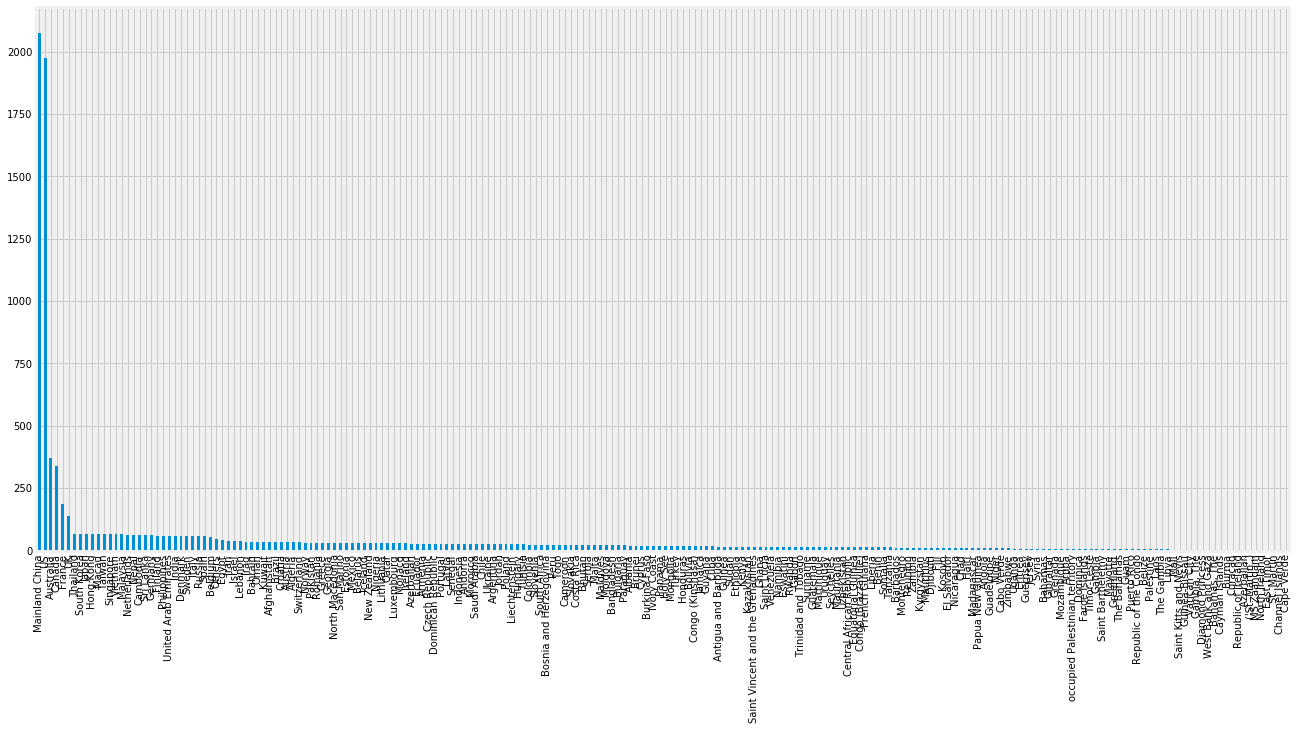

In [26]:
df['Country_Region'].value_counts().plot(kind='bar', figsize=(20,10))

In [27]:
df['Country_Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

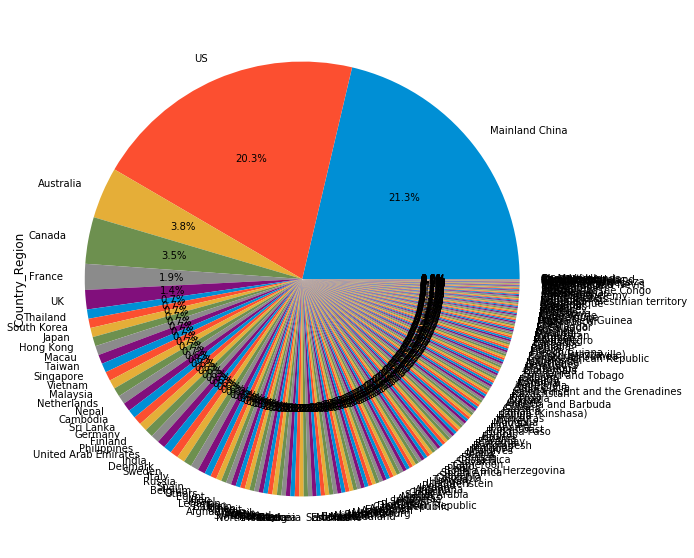

In [30]:

plt.figure(figsize=(20,10))
df['Country_Region'].value_counts().plot.pie(autopct='%1.1f%%')

check the distribution of map
+lat/long
+geometry point

In [33]:
dir(gpd)

NameError: name 'gpd' is not defined

In [35]:

df_per_day


,Confirmed,Deaths,Recovered
Last Update,,,
1/22/2020 17:00,444.0,17.0,28.0
1/23/20 17:00,444.0,17.0,28.0
1/24/20 17:00,549.0,24.0,31.0
1/25/20 17:00,761.0,40.0,32.0
1/26/20 16:00,1058.0,52.0,42.0
...,...,...,...
2020-03-25 23:37:49,74386.0,7503.0,60811.0
2020-03-26 23:53:24,80589.0,8215.0,61201.0
2020-03-27 23:27:48,86498.0,9134.0,61732.0


In [60]:
df2 = df


In [37]:
df.to_csv("coronavirus_data_clean.csv")

In [38]:
import datetime as dt

In [40]:
df['cases_date'] = pd.to_datetime(df2['Last Update'])

In [42]:
df2.dtypes

SNo                         int64
ObservationDate            object
Province_State             object
Country_Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
cases_date         datetime64[ns]
dtype: object

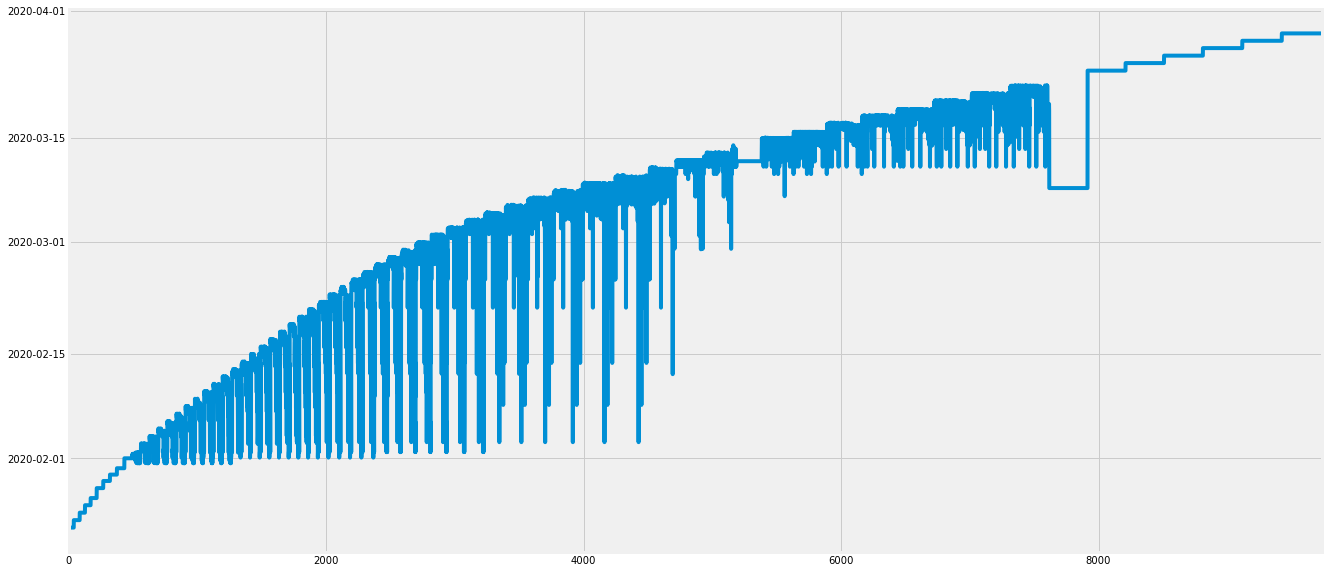

In [54]:
df['cases_date'].plot(figsize=(20,10))


In [57]:
ts = df2.set_index('cases_date')    #######set_index?????


In [45]:
# Select For January
ts.loc['2020-01']

,SNo,ObservationDate,Province_State,Country_Region,Last Update,Confirmed,Deaths,Recovered
cases_date,,,,,,,,
2020-01-22 17:00:00,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22 17:00:00,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22 17:00:00,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22 17:00:00,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22 17:00:00,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2020-01-31 08:15:53,1187,02/10/2020,NaN,Nepal,2020-01-31T08:15:53,1.0,0.0,0.0
2020-01-31 16:13:45,1249,02/11/2020,NaN,Russia,2020-01-31T16:13:45,2.0,0.0,0.0
2020-01-31 08:15:53,1255,02/11/2020,NaN,Cambodia,2020-01-31T08:15:53,1.0,0.0,0.0


In [46]:
ts.loc['2020-02-24':'2020-02-25']


,SNo,ObservationDate,Province_State,Country_Region,Last Update,Confirmed,Deaths,Recovered
cases_date,,,,,,,,
2020-02-24 11:13:09,2196,02/24/2020,Hubei,Mainland China,2020-02-24T11:13:09,64287.0,2495.0,16748.0
2020-02-24 10:23:02,2197,02/24/2020,Guangdong,Mainland China,2020-02-24T10:23:02,1345.0,6.0,786.0
2020-02-24 13:23:05,2198,02/24/2020,Henan,Mainland China,2020-02-24T13:23:05,1271.0,19.0,943.0
2020-02-24 09:43:02,2199,02/24/2020,Zhejiang,Mainland China,2020-02-24T09:43:02,1205.0,1.0,782.0
2020-02-24 14:13:11,2200,02/24/2020,Hunan,Mainland China,2020-02-24T14:13:11,1016.0,4.0,731.0
...,...,...,...,...,...,...,...,...
2020-02-24 23:33:02,4246,03/08/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
2020-02-24 23:33:02,4247,03/08/2020,"Travis, CA (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
2020-02-24 23:33:02,4510,03/09/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [47]:
ts.loc['2020-02-24':'2020-02-25'][['Confirmed','Recovered']]


,Confirmed,Recovered
cases_date,,
2020-02-24 11:13:09,64287.0,16748.0
2020-02-24 10:23:02,1345.0,786.0
2020-02-24 13:23:05,1271.0,943.0
2020-02-24 09:43:02,1205.0,782.0
2020-02-24 14:13:11,1016.0,731.0
...,...,...
2020-02-24 23:33:02,0.0,0.0
2020-02-24 23:33:02,0.0,0.0
2020-02-24 23:33:02,0.0,0.0


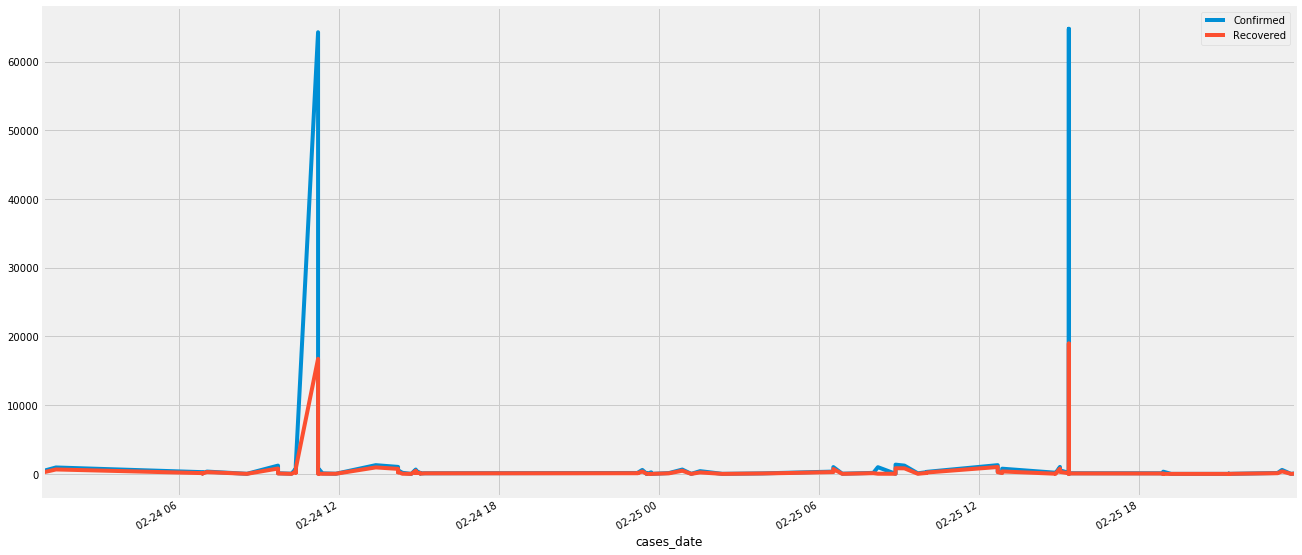

In [48]:
ts.loc['2020-02-24':'2020-02-25'][['Confirmed','Recovered']].plot(figsize=(20,10))


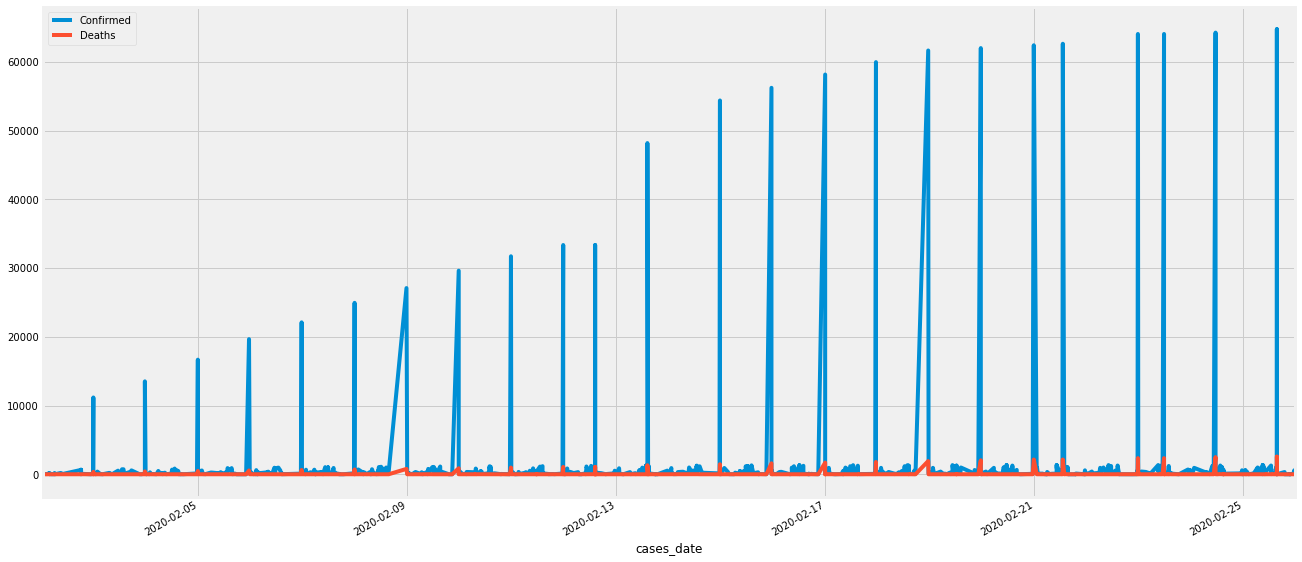

In [49]:
ts.loc['2020-02-2':'2020-02-25'][['Confirmed','Deaths']].plot(figsize=(20,10))


In [50]:
df_by_date = ts.groupby(['cases_date']).sum().reset_index(drop=None)
df_by_date

,cases_date,SNo,Confirmed,Deaths,Recovered
0,2020-01-22 17:00:00,741,555.0,17.0,28.0
1,2020-01-23 17:00:00,2829,653.0,18.0,30.0
2,2020-01-24 17:00:00,4305,941.0,26.0,36.0
3,2020-01-25 17:00:00,6490,1438.0,42.0,39.0
4,2020-01-26 16:00:00,9071,2118.0,56.0,52.0
...,...,...,...,...,...
1805,2020-03-24 23:41:50,2499640,417966.0,18615.0,107705.0
1806,2020-03-25 23:37:49,2615471,467594.0,21181.0,113770.0
1807,2020-03-26 23:53:24,2743137,529591.0,23970.0,122150.0
1808,2020-03-27 23:27:48,2846197,593291.0,27198.0,130915.0


In [51]:
df_by_date.columns


Index(['cases_date', 'SNo', 'Confirmed', 'Deaths', 'Recovered'], dtype='object')

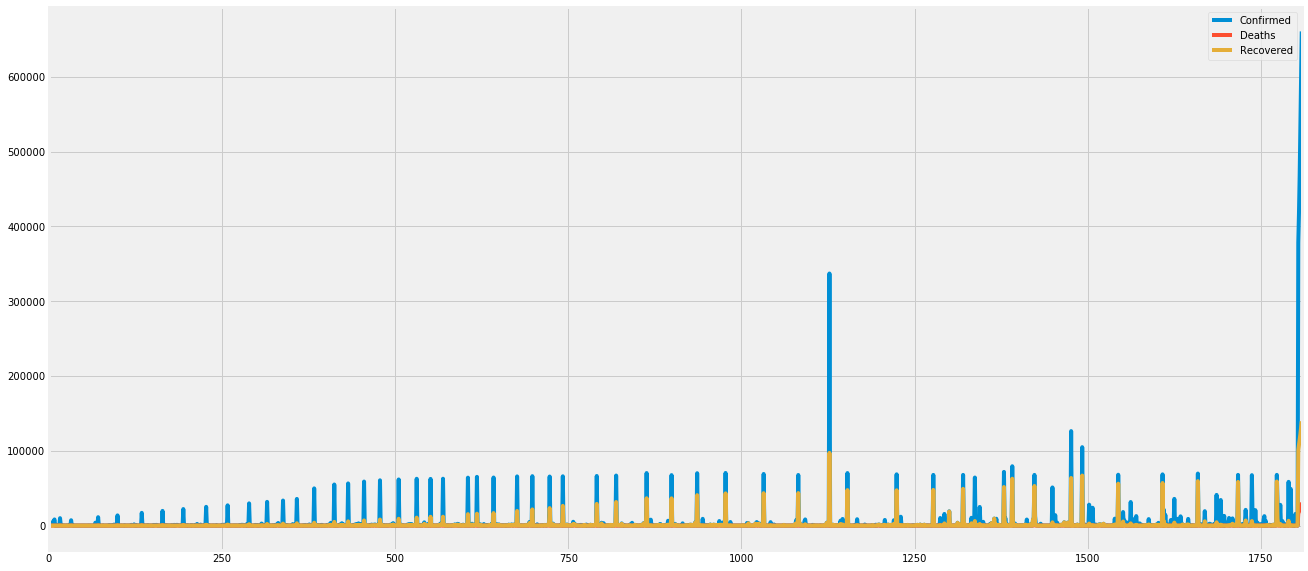

In [52]:
df_by_date[['Confirmed', 'Deaths', 'Recovered']].plot(kind='line',figsize=(20,10))


In [25]:
confirmed_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,24,24,40,40,74,84,94,110,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,87,90,139,201,230,264,302,367,409,454
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5


In [26]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,1,1,1,2,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,2,4,5,5,6,8,10
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,9,11,15,17,17,19,21,25,26,29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,1,1,1,1,3,3,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,2,2,2,10,17,17,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,32,32,32,65,65,24,65,29,29,31
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
cols = confirmed_df.keys()

In [29]:
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20'],
      dtype='object')

In [30]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [31]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,0,0,0,0,0,0,0,0,0,0,...,22,24,24,40,40,74,84,94,110,110
1,0,0,0,0,0,0,0,0,0,0,...,64,70,76,89,104,123,146,174,186,197
2,0,0,0,0,0,0,0,0,0,0,...,87,90,139,201,230,264,302,367,409,454
3,0,0,0,0,0,0,0,0,0,0,...,53,75,88,113,133,164,188,224,267,308
4,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,3,3,3,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,8
249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [32]:
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,2,4,4,4
1,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,4,5,5,6,8,10
2,0,0,0,0,0,0,0,0,0,0,...,9,11,15,17,17,19,21,25,26,29
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,3,3,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
recoveries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,2,2,2,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,2,2,10,17,17,31,31
2,0,0,0,0,0,0,0,0,0,0,...,32,32,32,65,65,24,65,29,29,31
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
dates = confirmed.keys()

In [35]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20'],
      dtype='object')

In [36]:
tconfirmed = confirmed.sum()

In [37]:
tconfirmed

1/22/20       555
1/23/20       654
1/24/20       941
1/25/20      1434
1/26/20      2118
            ...  
3/24/20    418045
3/25/20    467653
3/26/20    529591
3/27/20    593291
3/28/20    660706
Length: 67, dtype: int64

In [38]:


world_cases = []
tdeaths = [] 
trecovered = []
tactive = []
mortality_rate = []
recovery_rate = []
china_cases = []
India_cases = []
total_recovered = []
total_active = []
total_deaths = []

In [39]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    # aech country
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    India_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())

In [42]:

def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
India_daily_increase = daily_increase(India_cases)


In [47]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)


In [53]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]


In [56]:
###Convert integer into datetime for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
start_date

datetime.datetime(2020, 1, 22, 0, 0)

In [58]:

X_train_confirmed, X_test_confirmed,y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22,
                                                       world_cases, test_size=0.05, shuffle=False)

In [ ]:
x_